# Write a driver for hls ip
给hls ip写一个上层驱动

In [1]:
from pynq import DefaultIP

class DftDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
    
    bindto = ['xilinx.com:hls:dft:1.0']

# Import Overlay
导入Overlay

In [1]:
import pynq.lib.dma
import numpy as np
dftol = pynq.Overlay("dft.bit")

dma0 = dftol.axi_dma_0
dma1 = dftol.axi_dma_1

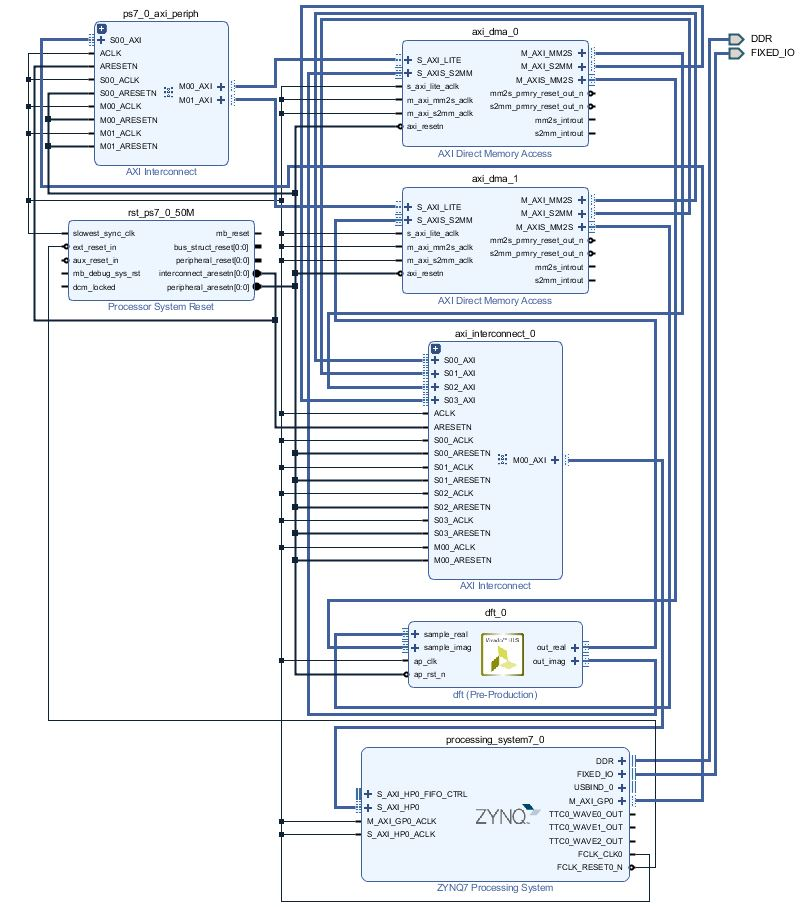

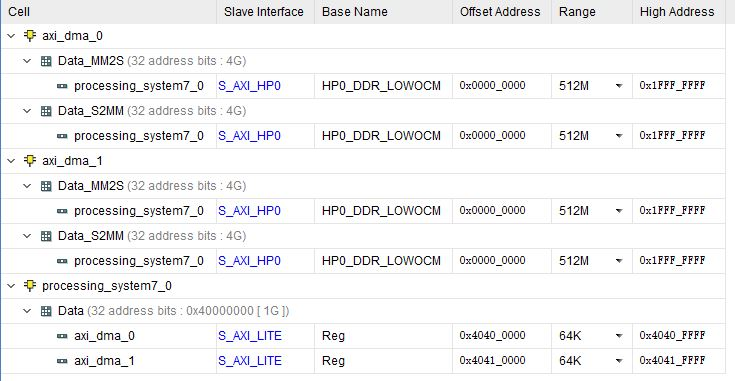

# The Fourier series is expressed as follows:
傅里叶级数的表现形式如下：

$$
\begin{aligned}
f(t)&\sim\frac{a_{0}}{2}+a_{1}cos(t)+a_{2}cos(2t)+a_{3}cos(3t)+\cdots \\  
&b_{1}sin(t)+b_{2}sin(2t)+b_{3}sin(3t)+\cdots \\
&\sim\frac{a_{0}}{2}+{\sum_{n=1}^{\infty}}(a_{n}cos(nt)+b_{n}sin(nt)
\end{aligned}
\quad
$$

# The parameter a_ {0}, a_ {1}... and b_ {0}, b_ {1}... computation formula is as follows:
其中参数a_{0},a_{1}...和b_{0},b_{1}...的计算公式如下：

$$
\begin{aligned}
a_{0}&=\frac{1}{\pi}\int_{-\pi}^{\pi}f(t)dt \\
a_{n}&=\frac{1}{\pi}\int_{-\pi}^{\pi}f(t)cos(nt)dt \\
b_{n}&=\frac{1}{\pi}\int_{-\pi}^{\pi}f(t)sin(nt)dt
\end{aligned}
\quad
$$

In [4]:
from pynq import Xlnk
xlnk = Xlnk()
samplereal = xlnk.cma_array(shape=(256,), dtype=np.float32)
sampleimag = xlnk.cma_array(shape=(256,), dtype=np.float32)
outreal = xlnk.cma_array(shape=(128,), dtype=np.float32)
outimag = xlnk.cma_array(shape=(128,), dtype=np.float32)

for i in range(128):
    samplereal[i] = 1
    
# for i in range(64,128):
#     samplereal[i] = 1 


for j in range(128):
    sampleimag[j] = 0
dma0.sendchannel.transfer(samplereal)
dma1.sendchannel.transfer(sampleimag)
dma0.recvchannel.transfer(outreal)
dma1.recvchannel.transfer(outimag)


In [5]:
print(outreal)
print(outimag)

[  1.28000000e+02  -1.05679035e-04  -1.06751919e-04  -1.02400780e-04
  -1.03890896e-04  -1.13725662e-04  -9.99569893e-05  -9.96589661e-05
  -8.95261765e-05  -1.11162663e-04  -1.10268593e-04  -9.33408737e-05
  -8.80956650e-05  -9.39965248e-05  -9.47713852e-05  -8.60691071e-05
  -8.57710838e-05  -1.03712082e-04  -1.15334988e-04  -9.72151756e-05
  -1.01268291e-04  -1.04188919e-04  -7.32243061e-05  -1.01685524e-04
  -7.39991665e-05  -1.04993582e-04  -5.56111336e-05  -8.18669796e-05
  -8.52942467e-05  -8.57859850e-05  -6.06626272e-05  -9.56729054e-05
  -6.26959663e-05  -7.34664500e-05  -1.10194087e-04  -6.93947077e-05
  -1.30072236e-04  -8.11666250e-05  -6.18398190e-05  -8.86023045e-05
  -7.46548176e-05  -5.87701797e-05  -6.23166561e-05  -7.34329224e-05
  -6.09755516e-05  -6.84857368e-05  -6.92009926e-05  -6.96778297e-05
  -4.56571579e-05  -4.54187393e-05  -6.77108765e-05  -1.88291073e-04
  -2.23517418e-05  -5.85913658e-05  -3.03983688e-05  -2.26497650e-05
  -3.27825546e-05  -2.21729279e-05

# drawing
画图

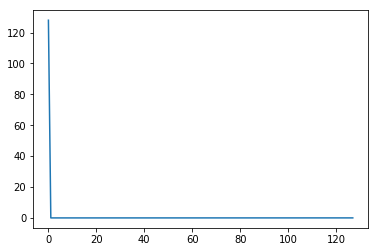

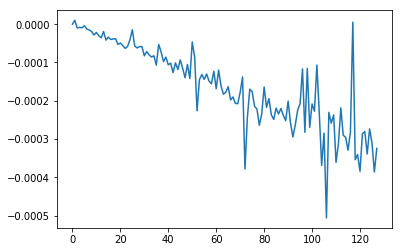

In [7]:
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft

actualreal = samplereal[0:128]
fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(outreal)

fig2 = plt.figure()
ax2 = fig2.gca()
plt.plot(outimag)